# Introduction

The goal of this notebook is to provide a simple way to create a submission file for The [Uber Nairobi Ambulance Perambulation Challenge](https://zindi.africa/competitions/uber-nairobi-ambulance-perambulation-challenge). we will go into my simple first solution and create a submission file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans
import random

In [2]:
# Load the data
df = pd.read_csv('../Data/Train_mod.csv',parse_dates=['datetime'])
print(df.shape)
df.head()

(6318, 9)


uid            datetime  latitude  longitude        date      time  \
0    1 2018-01-01 00:25:46 -1.188850  36.931382  2018-01-01  00:25:46   
1    2 2018-01-01 02:02:39 -0.662939  37.208730  2018-01-01  02:02:39   
2    3 2018-01-01 02:31:49 -0.662939  37.208730  2018-01-01  02:31:49   
3    4 2018-01-01 03:04:01 -1.288087  36.826583  2018-01-01  03:04:01   
4    5 2018-01-01 03:58:49 -1.188850  36.931382  2018-01-01  03:58:49   

  day_of_week    month  year  
0      Monday  January  2018  
1      Monday  January  2018  
2      Monday  January  2018  
3      Monday  January  2018  
4      Monday  January  2018

your solution and the way that you approch the challenge may be different than the method used in this notebook.<br>
I think that there are 2 main aproches to create the submission file, the first one is to create a model that ignores the date time features and the second solution is creating a model that takes in condcedaration the datetime feature

this is why I chose to create 2 different submission files

1) [first model : k-means ignoring time](#first-model-:-k-means-ignoring-time)<br><br>
2) [second model : K-means with 3 hours time split clustring](/#second-model-:-K-means-with-3-hours-time-split-clustring)<br><br>


## first model : k-means ignoring time

Now we are finding the 6 virtual ambulances locations  by grouping over the crashes locations in to 6 groups.<br>
we are using a popular and easy to understand algorithm called KMeans  to group over the craches places.<br>
in this first part we will <b>ignore</b> the time feature in this first part this means we will predict a <b>fixed</b> places for the 6 ambulances.

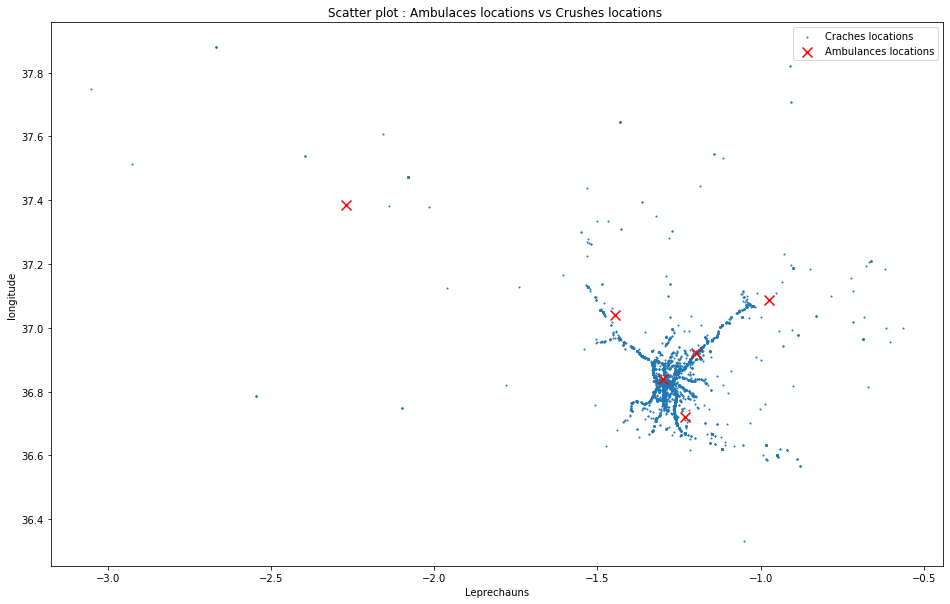

In [3]:
kmeans_global = KMeans(n_clusters=6, random_state=500).fit(df[['latitude','longitude']])

fig, axs = plt.subplots(figsize=(16, 10))

plt.scatter(x = df['latitude'],y=df['longitude'], s=1, label='Craches locations' )
plt.scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x",
            color='r',label='Ambulances locations',s=100)
axs.set_title('Scatter plot : Ambulaces locations vs Crushes locations ')
plt.xlabel("Leprechauns")
plt.ylabel("longitude")
plt.legend()
plt.show()

### preparing submission file

In [4]:
# View the submission format
ss = pd.read_csv('../Data/SampleSubmission.csv', parse_dates=['date'])
ss.head()

date  A0_Latitude  A0_Longitude  A1_Latitude  A1_Longitude  \
0 2019-07-01 00:00:00            0             0            0             0   
1 2019-07-01 03:00:00            0             0            0             0   
2 2019-07-01 06:00:00            0             0            0             0   
3 2019-07-01 09:00:00            0             0            0             0   
4 2019-07-01 12:00:00            0             0            0             0   

   A2_Latitude  A2_Longitude  A3_Latitude  A3_Longitude  A4_Latitude  \
0            0             0            0             0            0   
1            0             0            0             0            0   
2            0             0            0             0            0   
3            0             0            0             0            0   
4            0             0            0             0            0   

   A4_Longitude  A5_Latitude  A5_Longitude  
0             0            0             0  
1             0            0             0  
2             0            0             0  
3             0            0             0  
4             0            0             0

bellow I printed the cluster centers, we see that it has 2 columns (the first one is latitude and the second one is longitude).

In [5]:
kmeans_global.cluster_centers_

array([[-1.19904008, 36.92206058],
       [-1.23330826, 36.72098959],
       [-1.44752882, 37.0401509 ],
       [-2.26993277, 37.38589229],
       [-0.97528982, 37.08723472],
       [-1.29833511, 36.84037758]])

we need to flaten them to be in a format similar to the submission file.

In [6]:
def flaten(centers_list):
    """flatening the list of tuples [(x0,y0),(x1,y1),(x2,y2),(x3,y3)] to [x0,y0,x1,y1,x2,y2,x3,y3]"""
    merged = list(zip(centers_list[:,0],centers_list[:,1]))
    return [c for couple in merged for c in couple ]

so let's test our function

In [7]:
flaten(kmeans_global.cluster_centers_)

[-1.199040081285851,
 36.92206057910207,
 -1.2333082631941068,
 36.720989587484006,
 -1.4475288214910815,
 37.0401509016037,
 -2.26993277069289,
 37.385892286852695,
 -0.9752898218641668,
 37.08723471856972,
 -1.2983351100673866,
 36.84037758205396]

so it is working fine<br>
great :D<br>
let's build our submission file now 

In [8]:
t = flaten(kmeans_global.cluster_centers_)

#now we are going to build new dataframe for the submission
d = pd.DataFrame([])
d['date'] = ss['date'] 
for i in range(len(t)):
    d[ss.keys()[i+1]] = t[i] #i+1 cause the first column is date
d.head()

date  A0_Latitude  A0_Longitude  A1_Latitude  A1_Longitude  \
0 2019-07-01 00:00:00     -1.19904     36.922061    -1.233308      36.72099   
1 2019-07-01 03:00:00     -1.19904     36.922061    -1.233308      36.72099   
2 2019-07-01 06:00:00     -1.19904     36.922061    -1.233308      36.72099   
3 2019-07-01 09:00:00     -1.19904     36.922061    -1.233308      36.72099   
4 2019-07-01 12:00:00     -1.19904     36.922061    -1.233308      36.72099   

   A2_Latitude  A2_Longitude  A3_Latitude  A3_Longitude  A4_Latitude  \
0    -1.447529     37.040151    -2.269933     37.385892     -0.97529   
1    -1.447529     37.040151    -2.269933     37.385892     -0.97529   
2    -1.447529     37.040151    -2.269933     37.385892     -0.97529   
3    -1.447529     37.040151    -2.269933     37.385892     -0.97529   
4    -1.447529     37.040151    -2.269933     37.385892     -0.97529   

   A4_Longitude  A5_Latitude  A5_Longitude  
0     37.087235    -1.298335     36.840378  
1     37.087235    -1.298335     36.840378  
2     37.087235    -1.298335     36.840378  
3     37.087235    -1.298335     36.840378  
4     37.087235    -1.298335     36.840378

as mentioned before we ignored the date and time features. this is why our lines are the same for all the times as mentioned in the table<br>

In [9]:
d.to_csv('kmeans.csv')

## second model : K-means with 3 hours time split clustring

in this first part we will <b>ignore</b> the time feature in this first part this means we will predict a <b>fixed</b> places for the 6 ambulances.

in the cell bellow I looped over this list [0,3,6,9,12,15,18,21] to split the training dataset into 8 chunks based on the hours of the cruches (I mean I grouped the cruches between 00.00 to 02.59 and from 03.00 to 05.95 ....) and create separate data sets then create seperated models based on those datasets.<br>
then we used our older function to flaten the results and to create the submission file.

In [10]:
#modeling flatening the results and preparing submission file
for i in range(0,22,3):
    d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
    kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
    t = flaten(kmeans.cluster_centers_)
    ss.loc[ss['date'].dt.hour == i, ['A0_Latitude','A0_Longitude',
                                     'A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude',
                                     'A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude',
                                     'A5_Latitude','A5_Longitude']] = t
    

In [11]:
ss.head()

date  A0_Latitude  A0_Longitude  A1_Latitude  A1_Longitude  \
0 2019-07-01 00:00:00    -1.196050     36.923447    -2.497671     37.788891   
1 2019-07-01 03:00:00    -0.996639     37.044251    -1.318341     36.846015   
2 2019-07-01 06:00:00    -1.220844     36.892566    -2.272487     37.384144   
3 2019-07-01 09:00:00    -1.277225     36.868569    -1.026252     36.620439   
4 2019-07-01 12:00:00    -1.282357     36.823803    -1.141989     36.976817   

   A2_Latitude  A2_Longitude  A3_Latitude  A3_Longitude  A4_Latitude  \
0    -1.302300     36.843153    -0.912302     37.067283    -1.251698   
1    -2.549553     37.629724    -1.247231     36.735731    -1.520020   
2    -1.249694     36.731878    -1.053195     37.103977    -1.450653   
3    -2.282399     37.312977    -1.053138     37.028036    -1.456808   
4    -1.388426     36.957753    -0.816886     37.182421    -1.941905   

   A4_Longitude  A5_Latitude  A5_Longitude  
0     36.725445    -1.457051     37.124484  
1     37.156328    -1.225661     36.887187  
2     37.028129    -1.305988     36.838856  
3     37.029627    -1.280201     36.762681  
4     37.501344    -1.007614     36.618763

In [12]:
ss.to_csv('kmeans_by time')

## Comparing first and second model

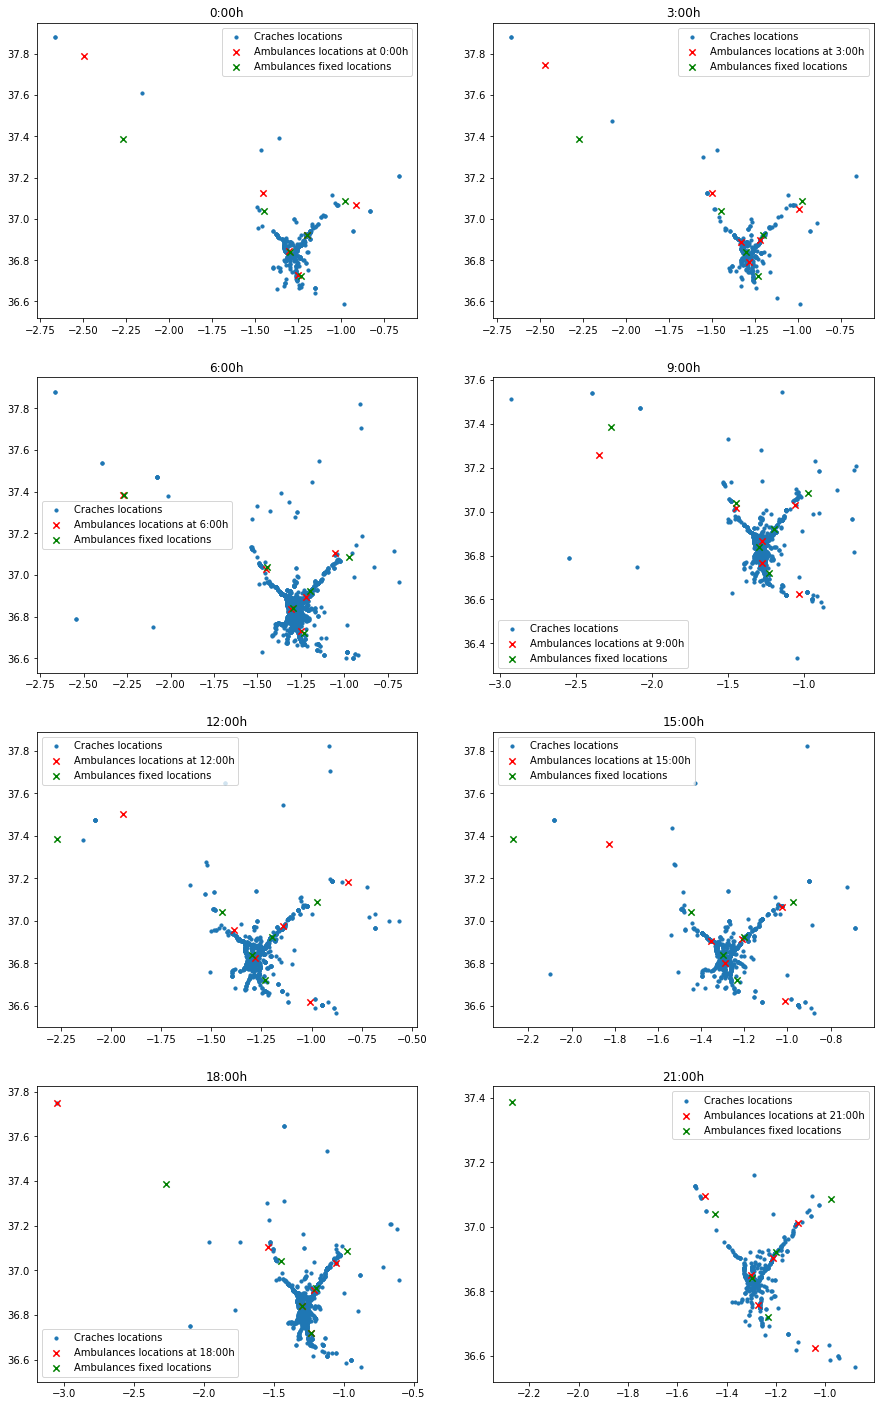

In [13]:

fig, axs = plt.subplots(4, 2,figsize=(15, 25))
models = []
i= 0
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[0, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[0, 0].set_title(str(i)+':00h')
axs[0, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[0, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[0, 0].legend()
#########################################################

i= 3
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[0, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[0, 1].set_title(str(i)+':00h')
axs[0, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[0, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[0, 1].legend()
########################################################


i=6
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[1, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[1, 0].set_title(str(i)+':00h')
axs[1, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[1, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[1, 0].legend()
#########################################################

i= 9
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[1, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[1, 1].set_title(str(i)+':00h')
axs[1, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[1, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[1, 1].legend()
########################################################


i= 12
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[2, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[2, 0].set_title(str(i)+':00h')
axs[2, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[2, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[2, 0].legend()
########################################################

i= 15
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[2, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[2, 1].set_title(str(i)+':00h')
axs[2, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[2, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[2, 1].legend()
########################################################


i= 18
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[3, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[3, 0].set_title(str(i)+':00h')
axs[3, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[3, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[3, 0].legend()
########################################################

i= 21
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[3, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[3, 1].set_title(str(i)+':00h')
axs[3, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[3, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[3, 1].legend()
########################################################


In [14]:
for j,k in enumerate(models):
    print("from",j*3,"to",(j*3)+3)
    for i in range(6):
        print("center",i,(k.cluster_centers_[i,0],k.cluster_centers_[i,1])," :",np.sum(k.labels_== i))
    print("##################################")

from 0 to 3
center 0 (-1.1960499426633322, 36.92344668719446)  : 88
center 1 (-2.49767067091915, 37.788890601409804)  : 3
center 2 (-1.3022998319421966, 36.84315260437484)  : 229
center 3 (-0.9123015427482563, 37.06728259602676)  : 13
center 4 (-1.2516983122192369, 36.72544484576621)  : 50
center 5 (-1.4570508903352384, 37.124483665810565)  : 6
##################################
from 3 to 6
center 0 (-1.2833838590821474, 36.790851046430575)  : 161
center 1 (-2.471671704418653, 37.743999601459834)  : 3
center 2 (-1.2166835171544235, 36.89638975005588)  : 63
center 3 (-1.3301847666685624, 36.888956920601096)  : 90
center 4 (-1.5010727118980631, 37.12321614743279)  : 10
center 5 (-0.9907558001414796, 37.045630826700574)  : 13
##################################
from 6 to 9
center 0 (-1.220844459219474, 36.89256578031258)  : 501
center 1 (-2.2724866556796295, 37.38414414470723)  : 14
center 2 (-1.2496940519123423, 36.73187769661907)  : 478
center 3 (-1.0531951866363374, 37.10397686608)  : 5

## 3rst model: K-means with 3 hours time split clustring per days

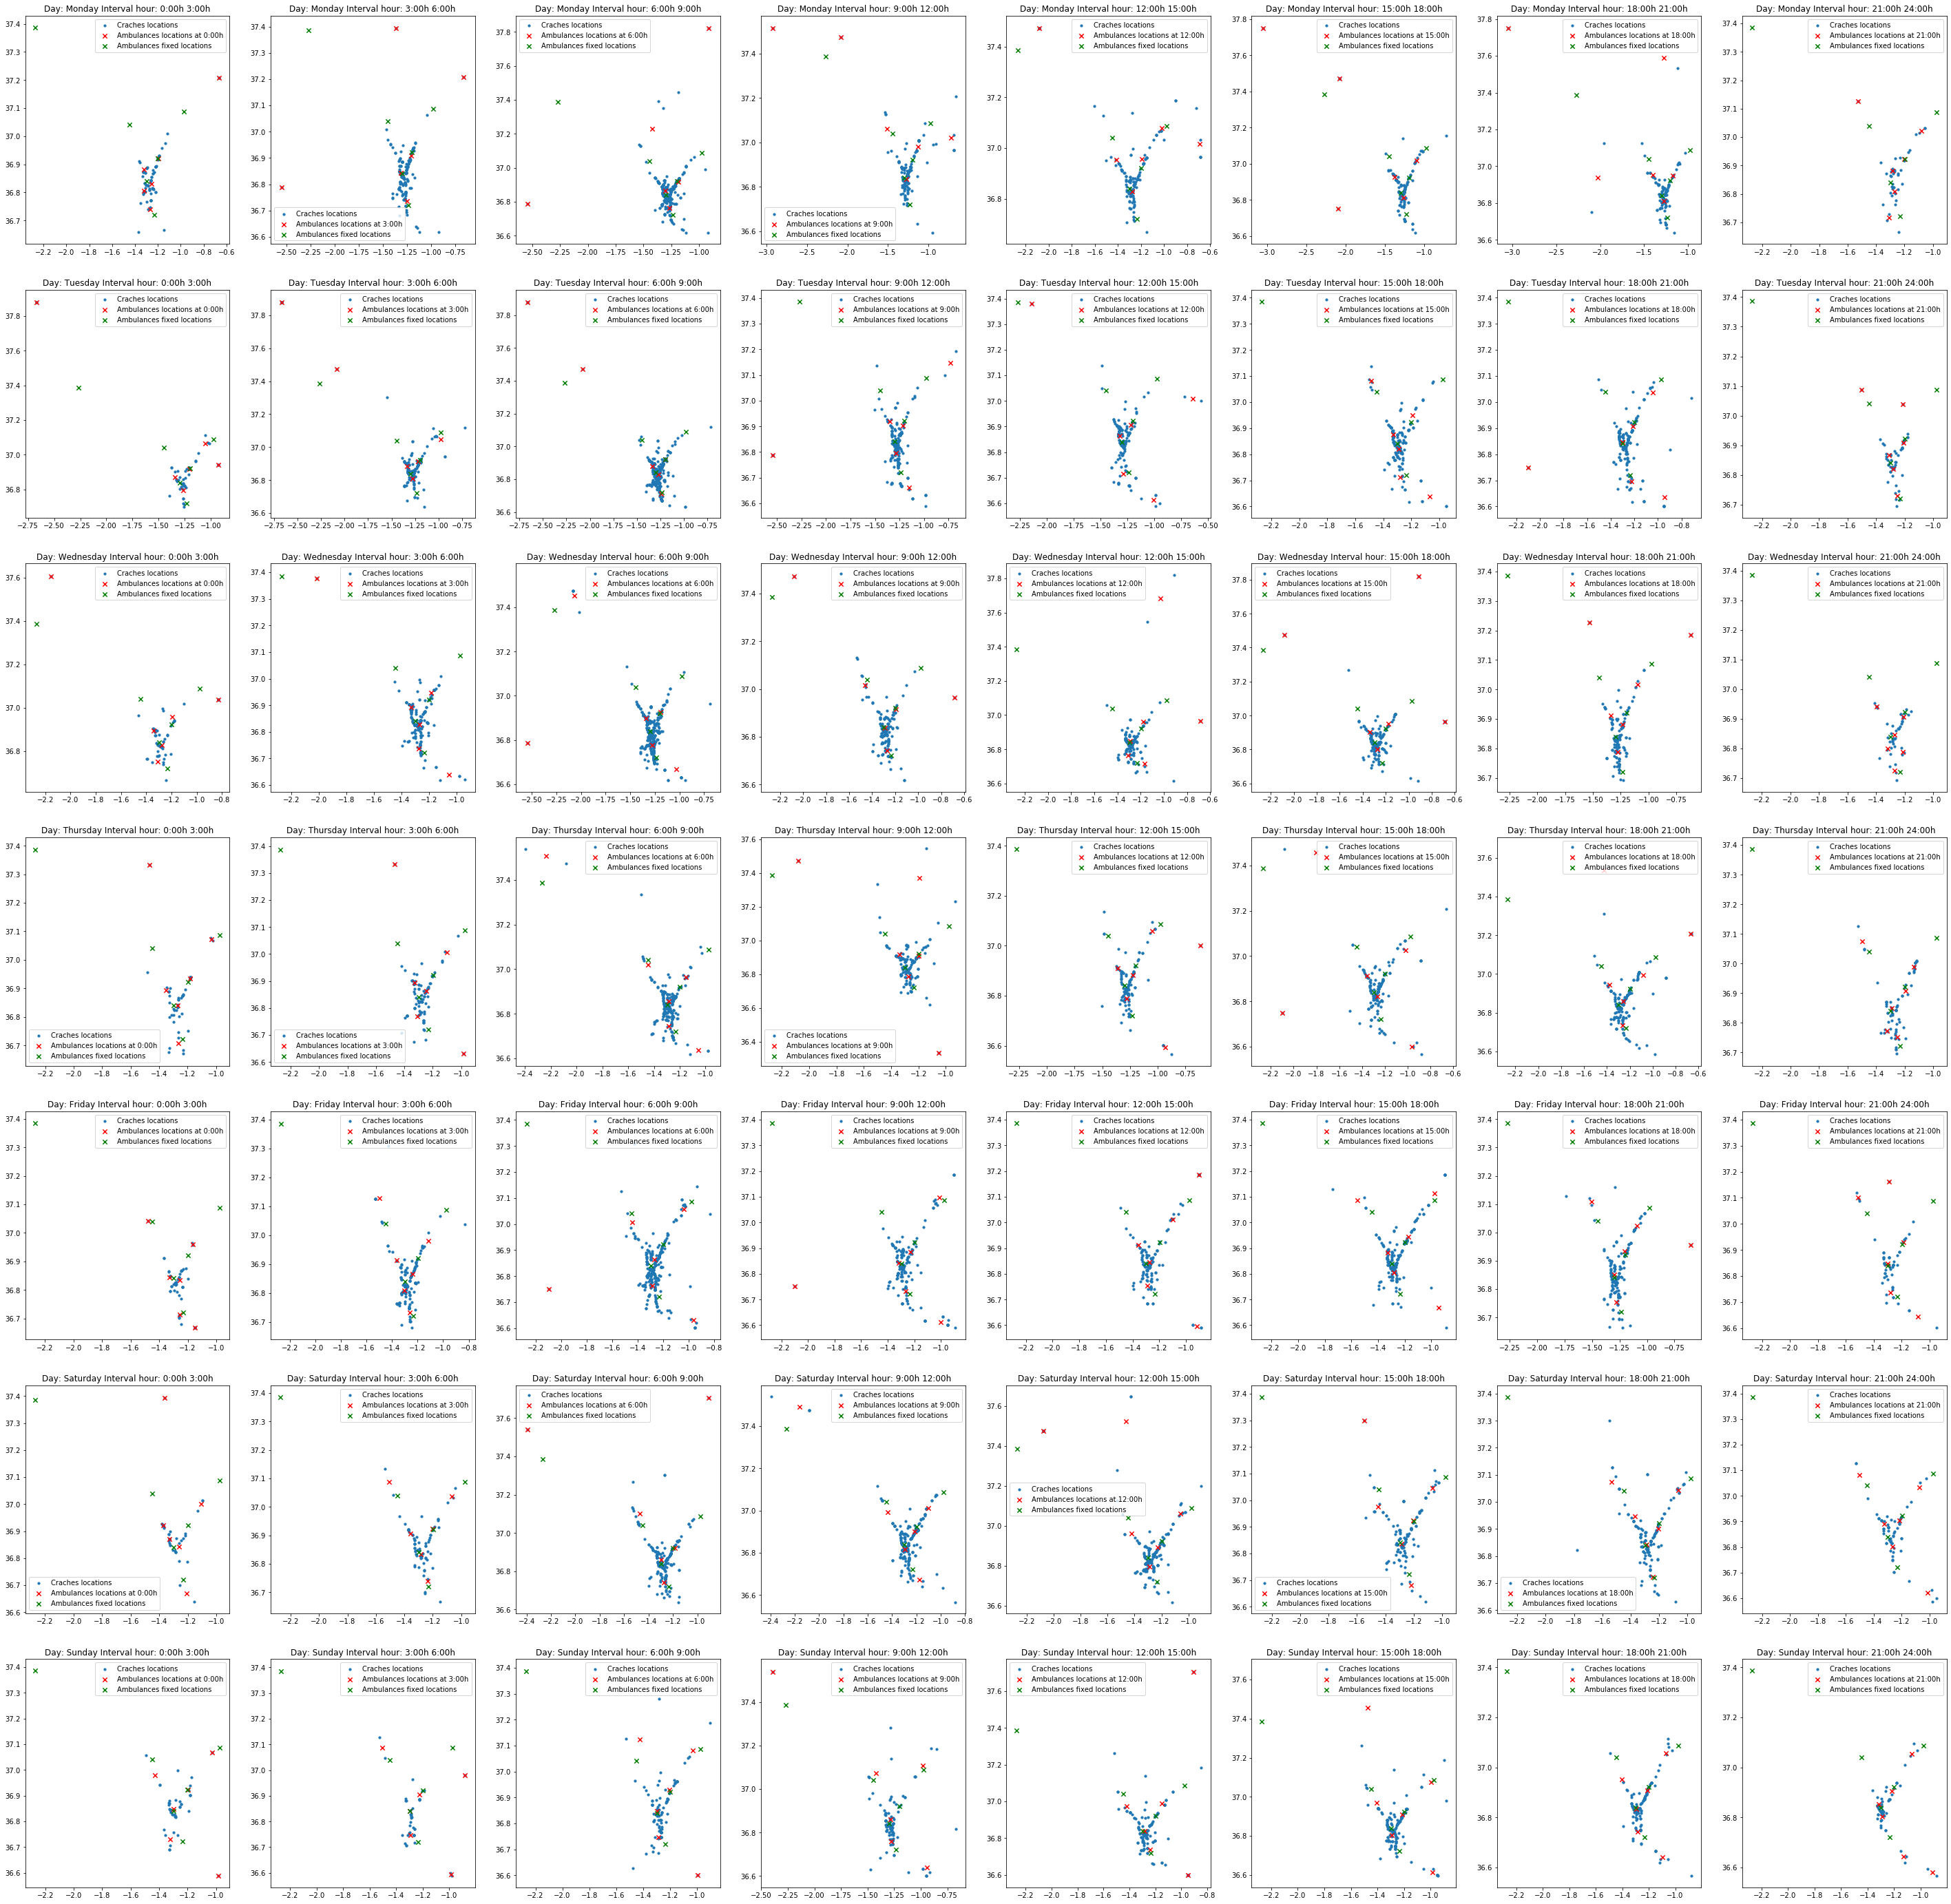

In [26]:
fig, axes = plt.subplots(7, 8, figsize=(50, 50))
l, m = 0, 0
for j in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']:
    for i in range(0,22,3):
        d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3) & (df['datetime'].dt.strftime("%A") == j)]
        kmeans = KMeans(n_clusters = 6, random_state=500).fit(d[['latitude','longitude']])
        t = flaten(kmeans.cluster_centers_)
        ss.loc[(ss['date'].dt.hour == i) & (ss['date'].dt.strftime("%A") == j), ['A0_Latitude','A0_Longitude','A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude','A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude','A5_Latitude','A5_Longitude']] = t
        axes[l, m].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
        axes[l, m].set_title('Day: ' + j + ' Interval hour: ' + str(i)+':00h' + ' ' + str(i+3) + ':00h')
        axes[l, m].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
        axes[l, m].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
        axes[l, m].legend()
        m += 1
    l += 1
    m = 0
plt.show()

In [27]:
ss.to_csv('kmeans_3h_d.csv')

## 3rst model: K-means with 3 hours time split clustring per days fit with hour

In [32]:
df['hour'] = df['datetime'].dt.hour
df

uid            datetime  latitude  longitude        date      time  \
0        1 2018-01-01 00:25:46 -1.188850  36.931382  2018-01-01  00:25:46   
1        2 2018-01-01 02:02:39 -0.662939  37.208730  2018-01-01  02:02:39   
2        3 2018-01-01 02:31:49 -0.662939  37.208730  2018-01-01  02:31:49   
3        4 2018-01-01 03:04:01 -1.288087  36.826583  2018-01-01  03:04:01   
4        5 2018-01-01 03:58:49 -1.188850  36.931382  2018-01-01  03:58:49   
...    ...                 ...       ...        ...         ...       ...   
6313  6314 2019-06-29 18:52:44 -1.262271  36.726540  2019-06-29  18:52:44   
6314  6315 2019-06-30 09:57:44 -1.279468  36.790449  2019-06-30  09:57:44   
6315  6316 2019-06-30 12:02:14 -1.322109  36.825248  2019-06-30  12:02:14   
6316  6317 2019-06-30 16:59:14 -1.278589  36.816518  2019-06-30  16:59:14   
6317  6318 2019-06-30 20:06:14 -1.211500  36.907635  2019-06-30  20:06:14   

     day_of_week    month  year  hour  
0         Monday  January  2018     0  
1         Monday  January  2018     2  
2         Monday  January  2018     2  
3         Monday  January  2018     3  
4         Monday  January  2018     3  
...          ...      ...   ...   ...  
6313    Saturday     June  2019    18  
6314      Sunday     June  2019     9  
6315      Sunday     June  2019    12  
6316      Sunday     June  2019    16  
6317      Sunday     June  2019    20  

[6318 rows x 10 columns]

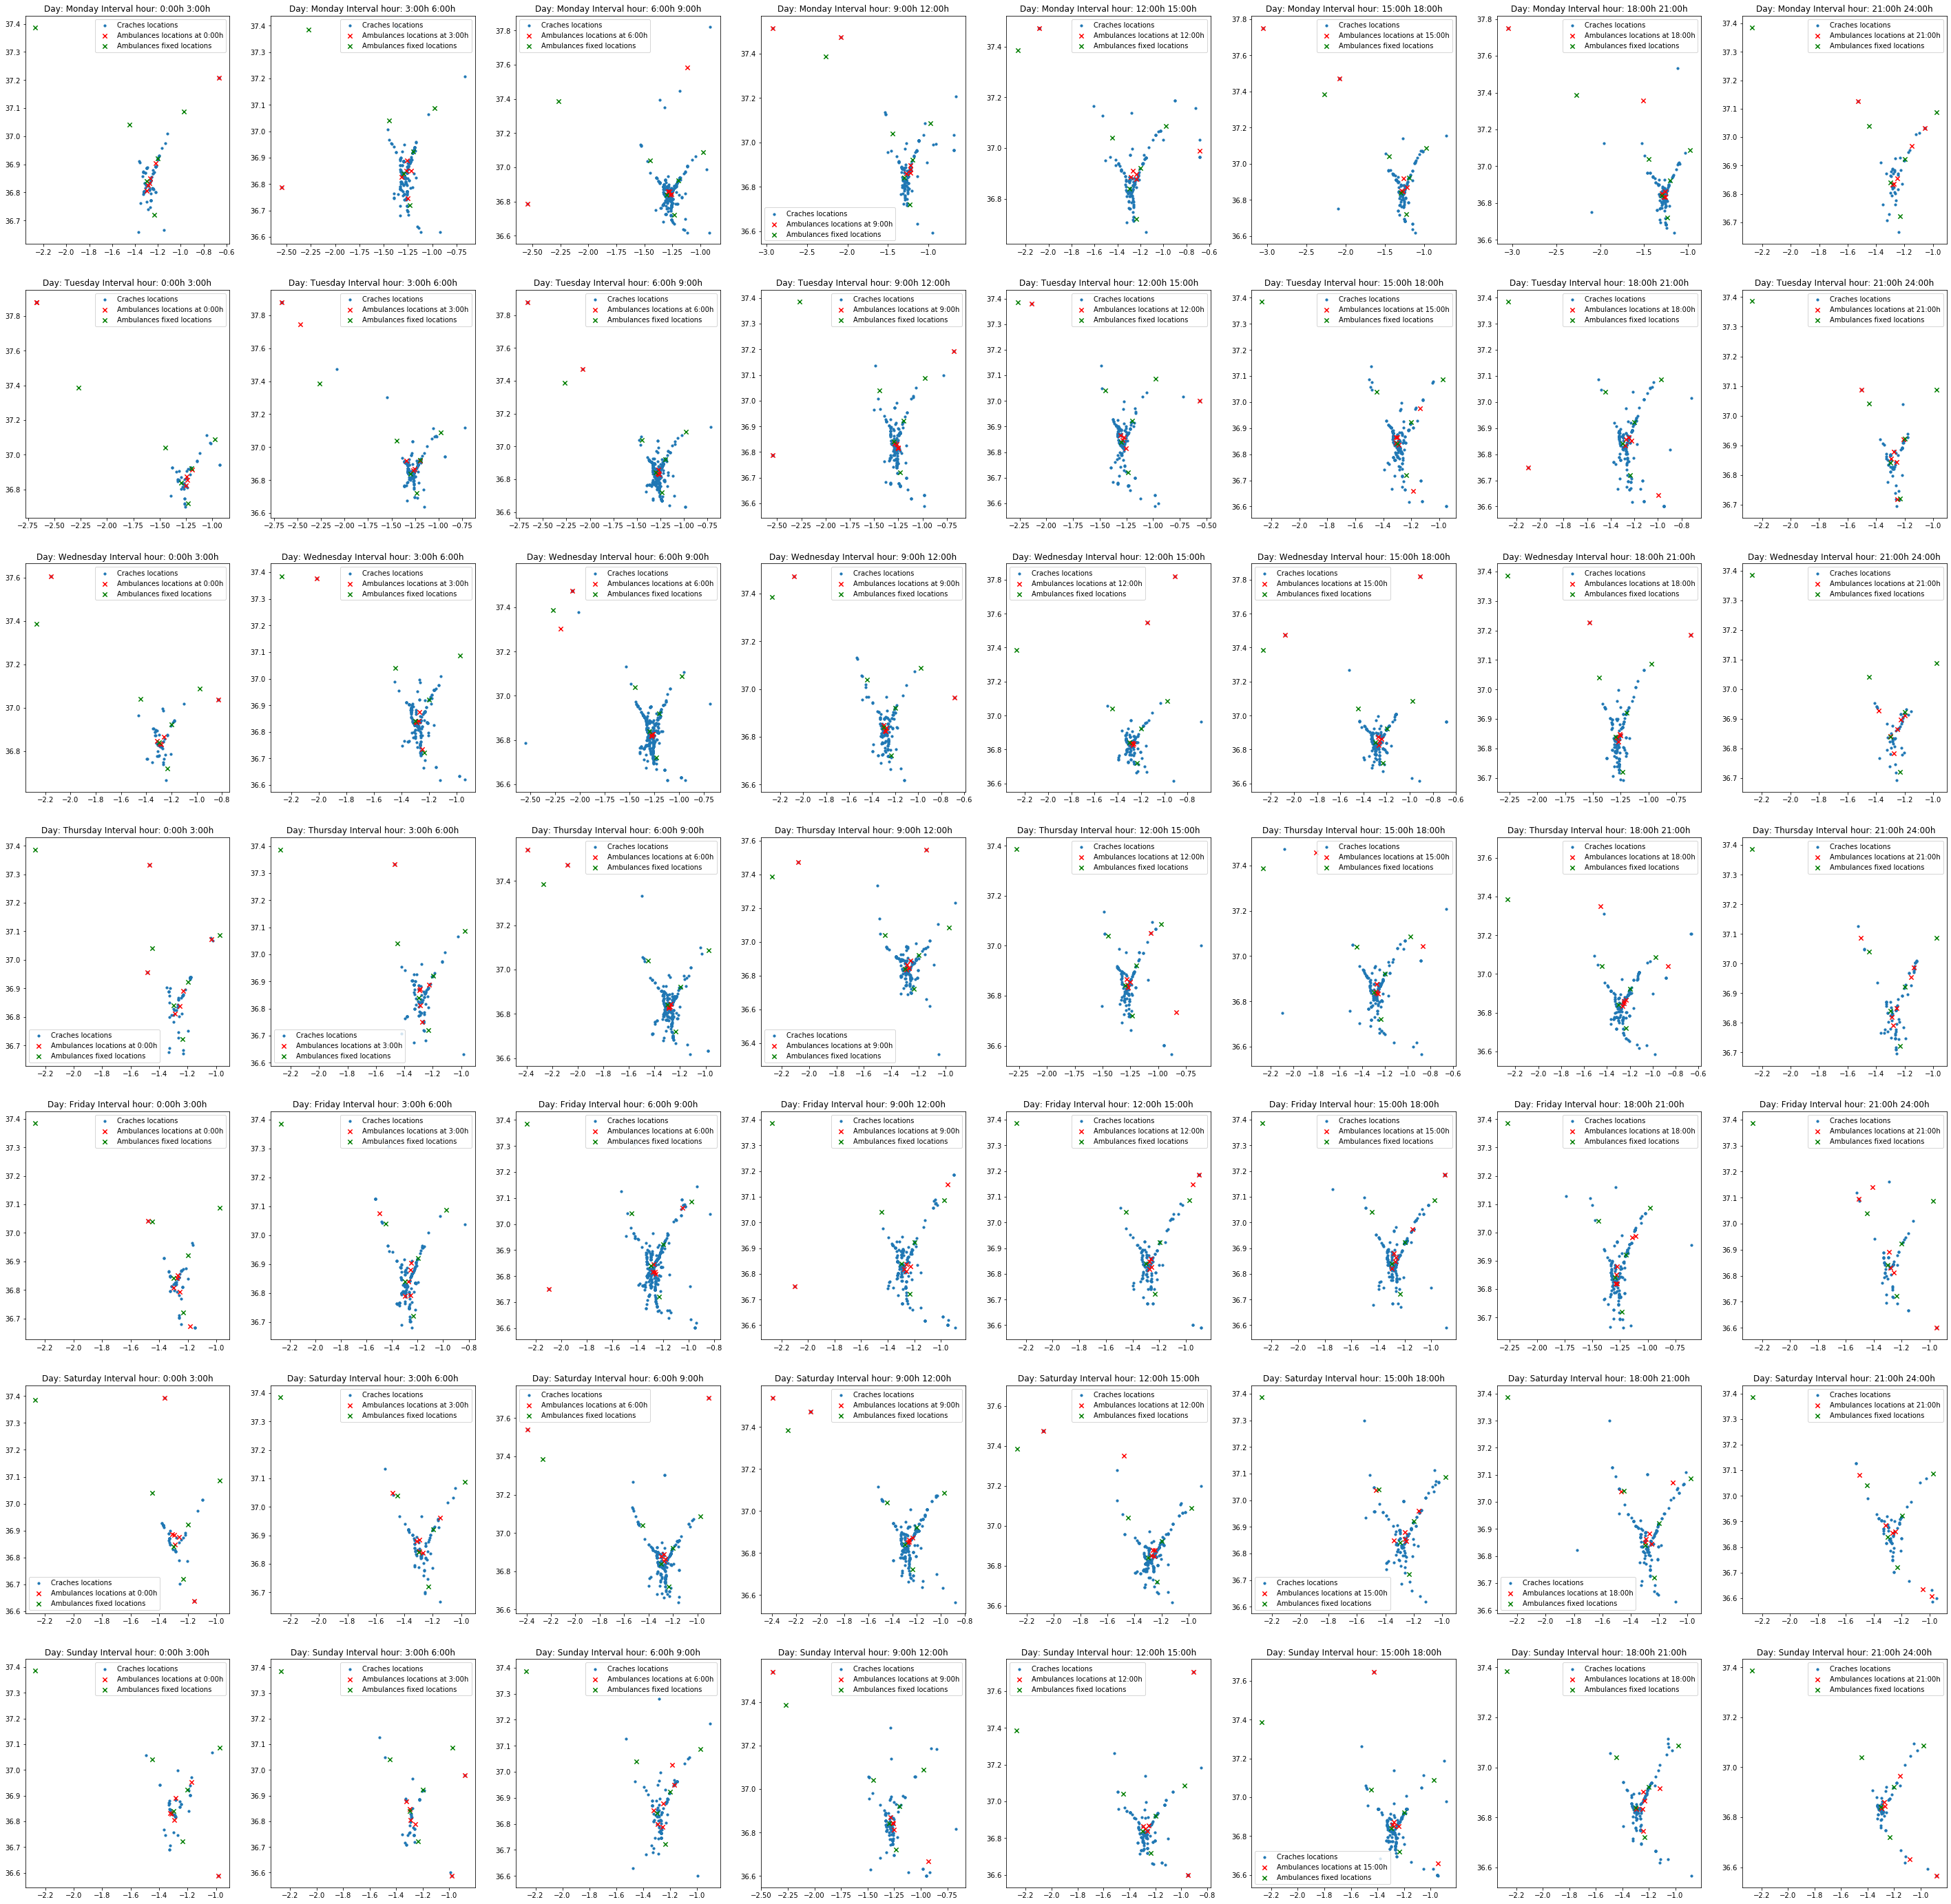

In [33]:
fig, axes = plt.subplots(7, 8, figsize=(50, 50))
l, m = 0, 0
for j in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']:
    for i in range(0,22,3):
        d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3) & (df['datetime'].dt.strftime("%A") == j)]
        kmeans = KMeans(n_clusters = 6, random_state=500).fit(d[['latitude','longitude', 'hour']])
        t = flaten(kmeans.cluster_centers_)
        ss.loc[(ss['date'].dt.hour == i) & (ss['date'].dt.strftime("%A") == j), ['A0_Latitude','A0_Longitude','A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude','A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude','A5_Latitude','A5_Longitude']] = t
        axes[l, m].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
        axes[l, m].set_title('Day: ' + j + ' Interval hour: ' + str(i)+':00h' + ' ' + str(i+3) + ':00h')
        axes[l, m].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
        axes[l, m].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
        axes[l, m].legend()
        m += 1
    l += 1
    m = 0
plt.show()

In [34]:
ss.to_csv('kmeans_3h_d_fit_hour.csv')

In [177]:
for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']:
    for i in range(0,22,3):
        d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3) & (df['month'] == m)]
        print(m,i)
        if d.shape[0]<6:
            kmeans = KMeans(n_clusters = d.shape[0], random_state=0).fit(d[['latitude','longitude']])
            t = flaten(kmeans.cluster_centers_)
            while len(t) < 12:
                t+=[t[-1]]
        else:
            kmeans = KMeans(n_clusters = 6, random_state=0).fit(d[['latitude','longitude']])
            t = flaten(kmeans.cluster_centers_)
        print(len(t))
        ss.loc[(ss['date'].dt.hour == i ) & (ss['date'].dt.month_name() == m), ['A0_Latitude','A0_Longitude','A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude','A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude','A5_Latitude','A5_Longitude']] = t

January 0
12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
March 0
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
April 0
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
May 0
12
May 3
12
May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
July 0
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12
July 21
12
August 0
12
August 3
12
August 6
12
August 9
12
August 12
12
August 15
12
August 18
12
August 21
12
September 0
12
September 3
12
September 6
12
September 9
12
September 12
12
September 15
12
September 18
12
September 21
12
October 0
12
October 3
12
October 6
12
October 9
12
October 12
12
October 15
12
October 18
12
October 21
12
November 0
12
No

In [180]:
ss.head()

date  A0_Latitude  A0_Longitude  A1_Latitude  A1_Longitude  \
0 2019-07-01 00:00:00    -1.210685     36.887162    -1.395704     36.940892   
1 2019-07-01 03:00:00    -1.219741     36.871456    -2.016460     37.377515   
2 2019-07-01 06:00:00    -2.069306     37.457102    -1.261158     36.772509   
3 2019-07-01 09:00:00    -1.231009     36.682637    -1.273821     36.816077   
4 2019-07-01 12:00:00    -1.335116     36.874877    -2.109373     37.426929   

   A2_Latitude  A2_Longitude  A3_Latitude  A3_Longitude  A4_Latitude  \
0    -1.288828     36.819566    -1.290994     36.828092    36.828092   
1    -1.280914     36.792516    -1.425182     36.967586    -1.326648   
2    -1.288941     36.846384    -1.382681     36.940743    -1.068673   
3    -2.079875     37.473019    -1.378912     36.930434    -0.669597   
4    -1.122487     36.986571    -1.282062     36.787644    -1.254075   

   A4_Longitude  A5_Latitude  A5_Longitude  
0     36.828092    36.828092     36.828092  
1     36.892035    -0.941274     36.619535  
2     36.986763    -1.206604     36.675326  
3     37.200453    -1.028575     37.018731  
4     36.867055    -1.149238     36.667043

### 5th model: K-means with 3 hours time split clustring per mounth and per days

In [185]:
for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']:
     for j in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']:   
        for i in range(0,22,3):
            d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.strftime("%A") == j) & (df['datetime'].dt.hour<=i+3) & (df['month'] == m)]
            print(m,i)
            if d.shape[0] == 0:
                print(d.shape)
            elif d.shape[0]<6: 
                kmeans = KMeans(n_clusters = d.shape[0], random_state=0).fit(d[['latitude','longitude']])
                t = flaten(kmeans.cluster_centers_)
                while len(t) < 12:
                    t+=[t[-1]]
            else:
                kmeans = KMeans(n_clusters = 6, random_state=0).fit(d[['latitude','longitude']])
                t = flaten(kmeans.cluster_centers_)
            print(len(t))
            ss.loc[(ss['date'].dt.hour == i ) & (ss['date'].dt.strftime("%A") == j) & (ss['date'].dt.month_name() == m), ['A0_Latitude','A0_Longitude','A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude','A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude','A5_Latitude','A5_Longitude']] = t

January 0
12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21
12
January 0
12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


January 0
12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21
12
January 0
12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
January 0
12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
January 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21
(0, 9)
12
January 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
January 3
12
January 6
12
January 9
12
January 12
12
January 15
12
January 18
12
January 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
February 0
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
February 0
12
February 3
12
February 6
12
February 9
12
February 12
12
February 15
12
February 18
12
February 21
12
March 0
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
March 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
March 0
(0, 9)
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
March 0
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
March 0
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
March 0
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21
12
March 0
12
March 3
12
March 6
12
March 9
12
March 12
12
March 15
12
March 18
12
March 21


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
April 0
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
April 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
April 0
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
April 0
(0, 9)
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
April 0
(0, 9)
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
April 0
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
April 0
12
April 3
12
April 6
12
April 9
12
April 12
12
April 15
12
April 18
12
April 21
12
May 0
12
May 3
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
May 0
(0, 9)
12
May 3
12
May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
May 0
12
May 3
12
May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
May 0
(0, 9)
12
May 3
12
May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
May 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
May 3
12
May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
May 0
12
May 3
12
May 6
12
May 9
12
May 12
12
May 15
12
May 18
12
May 21
12
May 0
12
May 3
12
May 6
12
May 9
12
May 12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
May 15
12
May 18
12
May 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
June 0
(0, 9)
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
June 0
12
June 3
12
June 6
12
June 9
12
June 12
12
June 15
12
June 18
12
June 21
12
July 0
(0, 9)
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12
July 21
12
July 0
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12
July 21
12
July 0
(0, 9)
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12
July 21
12
July 0
(0, 9)
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


July 21
12
July 0
(0, 9)
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12
July 21
12
July 0
(0, 9)
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
July 21
(0, 9)
12
July 0
12
July 3
12
July 6
12
July 9
12
July 12
12
July 15
12
July 18
12
July 21
12
August 0
12
August 3
12
August 6
12
August 9
12
August 12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
August 15
12
August 18
12
August 21
12
August 0
(0, 9)
12
August 3
12
August 6
12
August 9
12
August 12
12
August 15
12
August 18
12
August 21
12
August 0
12
August 3
12
August 6
12
August 9
12
August 12
12
August 15
12
August 18
12
August 21
12
August 0
(0, 9)
12
August 3
12
August 6
12
August 9
12
August 12
12
August 15
12
August 18
12
August 21
12
August 0
(0, 9)
12
August 3
12
August 6
12
August 9
12
August 12
12
August 15
12
August 18
12
August 21
12
August 0
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


August 3
12
August 6
12
August 9
12
August 12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
August 15
12
August 18
12
August 21
12
August 0
(0, 9)
12
August 3


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
August 6
12
August 9
12
August 12
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


August 15
12
August 18


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
August 21
12
September 0
(0, 9)
12
September 3
12
September 6
12
September 9
12
September 12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
September 15
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


September 18
12
September 21
12
September 0
(0, 9)
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


September 3


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
September 6
12
September 9
12
September 12
12
September 15
12
September 18
12
September 21
12
September 0
12
September 3
12
September 6
12
September 9


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
September 12
12
September 15
12
September 18
12
September 21
12
September 0
12
September 3


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
September 6
12
September 9
12
September 12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
September 15
12
September 18
12
September 21
12
September 0
(0, 9)
12
September 3
12
September 6
12
September 9
12
September 12
12
September 15
12
September 18
12
September 21
12
September 0
12
September 3
12
September 6
12
September 9
12
September 12
12
September 15
12
September 18
12
September 21
(0, 9)
12
September 0
(0, 9)
12
September 3
12
September 6


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
September 9
12
September 12
12
September 15
12
September 18
12
September 21
12
October 0
(0, 9)
12
October 3
12
October 6
12
October 9
12
October 12
12
October 15
12
October 18
12
October 21
12
October 0
(0, 9)
12
October 3
12
October 6
12
October 9
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


October 12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
October 15
12
October 18
12
October 21
12
October 0
(0, 9)
12
October 3


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
October 6
12
October 9
12
October 12
12
October 15
12
October 18
12
October 21
12
October 0
12
October 3
12
October 6
12
October 9
12
October 12
12
October 15
12
October 18
12
October 21
12
October 0
(0, 9)
12
October 3
12
October 6
12
October 9
12
October 12
12
October 15
12
October 18
12
October 21
12
October 0
(0, 9)
12
October 3


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
October 6
12
October 9
12
October 12
12
October 15
12
October 18
12
October 21
(0, 9)
12
October 0
12
October 3
12
October 6
12
October 9
12
October 12
12
October 15
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


October 18
12
October 21
12
November 0
12
November 3
12
November 6
12
November 9
12
November 12
12
November 15
12
November 18


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
November 21
12
November 0
(0, 9)
12
November 3
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  if __name__ == '__main__':


November 6
12
November 9
12
November 12
12
November 15
12
November 18
12
November 21
12
November 0
12
November 3
12
November 6
12
November 9
12
November 12
12
November 15
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


November 18
12
November 21
12
November 0
(0, 9)
12
November 3
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  if __name__ == '__main__':


November 6
12
November 9
12
November 12
12
November 15
12
November 18
12
November 21
12
November 0
(0, 9)
12
November 3
12
November 6
12
November 9
12
November 12
12
November 15
12
November 18
12
November 21
12
November 0
12
November 3
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  if __name__ == '__main__':


November 6
12
November 9
12
November 12
12
November 15
12
November 18
12
November 21
12
November 0
12
November 3
12
November 6
12
November 9


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
November 12
12
November 15
12
November 18


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
November 21
12
December 0
(0, 9)
12
December 3
12
December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21
12
December 0
12
December 3
12
December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21
12
December 0
(0, 9)
12
December 3
12


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if __name__ == '__main__':


December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21
12
December 0
(0, 9)
12
December 3
12
December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21
(0, 9)
12
December 0
12
December 3


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21
(0, 9)
12
December 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
December 3
12
December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


12
December 0


/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  if __name__ == '__main__':


12
December 3
12
December 6
12
December 9
12
December 12
12
December 15
12
December 18
12
December 21
12


In [190]:
ss.isna().sum

0